#### Steps in building a model
* Read data
* Feature engineering
* Create a train set and a test set
* Use train set to build the model
* Test the model
* Visualize

In [26]:
# Importing essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Read data

In [27]:
#importing data from csv file
computers = pd.read_csv("computers.csv")
computers.head(5)

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


### Feature engineering

In [28]:
# Calculating the mean
mean_value = computers['Minutes'].mean()
mean_value

97.21428571428571

Text(0, 0.5, 'Minutes')

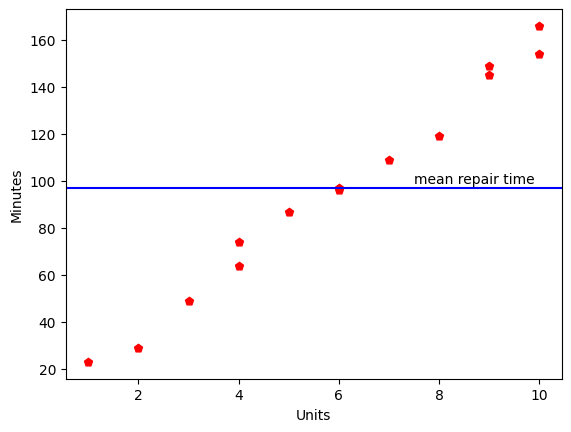

In [29]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers["Units"],computers["Minutes"],color = "red" , marker="p")

# Plotting the mean time
plt.axhline(y=mean_value, c="blue")

# Plotting the annotations , x-label , y-label
plt.annotate("mean repair time",xy=(7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")



In [30]:
# Creating three Linear Regression models
minutes_model0 = computers['Minutes'].mean()   #Model0 : Estimated time = Mean('Minutes')
minutes_model1 = 10 + 12 * computers['Units']  #Model1 : Estimated time = 10+ 12 *(units) minutes
minutes_model2 = 6 + 18 * computers['Units']   #Model2 : Estimated time = 6 + 18 *(units) minutes


In [31]:
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2

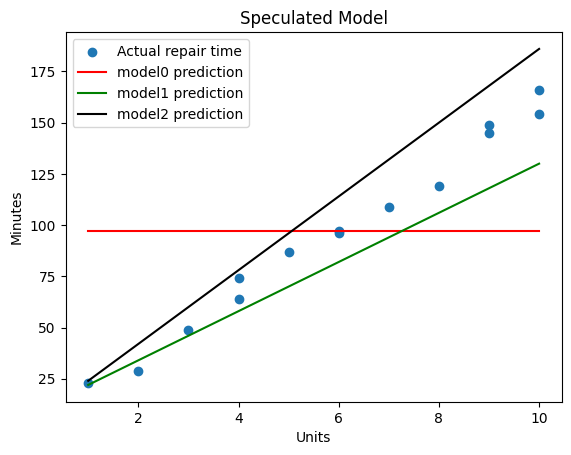

In [32]:
fig,ax = plt.subplots( )

# plotting the actual 'Minute'
ax.scatter(x="Units",y="Minutes",data=computers,label='Actual repair time')

# plotting the model0 prediction
ax.plot(computers['Units'],computers['min_model0'],color="red",label="model0 prediction")

# plotting the model1 prediction
ax.plot(computers['Units'],computers['min_model1'],color="green",label="model1 prediction")

#plotting the model2 prediction
ax.plot(computers['Units'],computers['min_model2'],color="black",label="model2 prediction")

# Adding xlabel, ylabel,title and legend
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Model")
ax.legend()

In [33]:
model0_obs = pd.DataFrame({
    "Units": computers["Units"], 
    "Actual-time": computers["Minutes"],
    "Predicted-time": computers["min_model0"],
    "Error":(computers['min_model0'] - computers['Minutes'])
})
model0_obs


,Units,Actual-time,Predicted-time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [34]:
# sum of error
sum(model0_obs['Error'])

1.4210854715202004e-14

In [35]:
# squared sum of error
sum(model0_obs['Error']**2)

27768.357142857145